# Импорт

In [148]:
import sys
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
from random import shuffle
sys.path.append("../Project")
from Classes.Ant import Ant
from Classes.TrackOfWalk import TrackOfWalk

# Общие переменные

In [149]:
field_size = 100

In [150]:
feromon_map = np.random.rand(field_size, field_size)
feromon_map = (feromon_map + feromon_map.T) / 2 
np.fill_diagonal(feromon_map, -np.inf)
distance_map = np.random.rand(field_size, field_size)
distance_map = (distance_map + distance_map.T) / 2 
np.fill_diagonal(distance_map, -np.inf)

In [151]:
print(feromon_map)

[[      -inf 0.4827348  0.82242917 ... 0.45358955 0.64042075 0.43367031]
 [0.4827348        -inf 0.28012119 ... 0.52786979 0.59983637 0.38829357]
 [0.82242917 0.28012119       -inf ... 0.43819188 0.17863712 0.18162621]
 ...
 [0.45358955 0.52786979 0.43819188 ...       -inf 0.48164968 0.49413461]
 [0.64042075 0.59983637 0.17863712 ... 0.48164968       -inf 0.46127685]
 [0.43367031 0.38829357 0.18162621 ... 0.49413461 0.46127685       -inf]]


In [152]:
print(distance_map)

[[      -inf 0.13505419 0.47716872 ... 0.14319003 0.36791851 0.7732028 ]
 [0.13505419       -inf 0.54162475 ... 0.77482328 0.3878104  0.54863465]
 [0.47716872 0.54162475       -inf ... 0.93440997 0.49823113 0.71564455]
 ...
 [0.14319003 0.77482328 0.93440997 ...       -inf 0.36718794 0.35634558]
 [0.36791851 0.3878104  0.49823113 ... 0.36718794       -inf 0.28269617]
 [0.7732028  0.54863465 0.71564455 ... 0.35634558 0.28269617       -inf]]


In [153]:
edges = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j:
            edges.append((i, j, distance_map[i][j]))


In [154]:
def experement(ant: Ant,
               pos: iter,
               feromon_map_updater: TrackOfWalk, 
               feromon_map: np.ndarray, 
               distance_map: np.ndarray):
    track = ant.walk(pos=pos, 
                     distance_matrix=distance_map, 
                     feromon_matrix=feromon_map)
    feromon_map = feromon_map_updater.update(track=track, 
                                                feromon_matrix=feromon_map)
    return feromon_map

In [155]:
ants = [Ant(walk_distance=field_size+1, a=1, b=i) for i in range(1, 100)]
ants_blocks = [[Ant(walk_distance=50, a=j, b=1) for i in range(1, 20)] for j in np.arange(-1, 1, 0.05)]
feromon_map_updater = TrackOfWalk(feromon_volume=field_size*100, feromon_erosion_speed=0.9999)
positions = [[i, i] for i in range(0, 100, 1)]
shuffle(positions)


In [156]:
def Dijkstra(N, S, matrix):
	valid = [True]*N        
	weight = [np.inf]*N
	weight[S] = 0
	way = []
	for i in range(N):
		min_weight = np.inf
		ID_min_weight = -1
		for j in range(N):
			if valid[j] and weight[j] < min_weight:
				min_weight = weight[j]
				ID_min_weight = j
		for z in range(N):
			if weight[ID_min_weight] + matrix[ID_min_weight][z] < weight[z]:
				weight[z] = weight[ID_min_weight] + matrix[ID_min_weight][z]
		valid[ID_min_weight] = False
		way.append(ID_min_weight)
	return weight, way

In [157]:
def experement_ants(ants, positions, num_of_iterations, feromon_map, distance_map):
    fm = np.array(feromon_map, copy=True)
    for _ in range(num_of_iterations):
        for ant, pos in zip(ants, positions):
            fm = experement(ant=ant, 
                            pos=pos, 
                            feromon_map_updater=feromon_map_updater, 
                            feromon_map=fm, 
                            distance_map=distance_map)
    way = Dijkstra(100, 1, fm*(-1))[1]
    print(way)
    return [distance_map[i[0], i[1]] for i in np.array(list(zip(way[:-2], way[1:])))], way, fm

In [158]:
res = []
for ants_block in ants_blocks:
    res.append(experement_ants(ants=ants_block, positions=positions, num_of_iterations=5, feromon_map=feromon_map, distance_map=distance_map))

[1, 40, 84, 97, 35, 36, 25, 10, 50, 27, 63, 24, 13, 3, 41, 9, 14, 99, 88, 16, 82, 18, 77, 96, 46, 60, 49, 59, 58, 31, 66, 6, 90, 76, 62, 53, 43, 12, 69, 74, 54, 61, 22, 67, 4, 83, 39, 48, 37, 87, 98, 65, 89, 7, 2, 93, 91, 47, 20, 75, 73, 57, 11, 0, 92, 55, 21, 45, 52, 78, 15, 42, 95, 51, 23, 33, 56, 79, 68, 19, 34, 8, 44, 5, 17, 80, 81, 30, 28, 26, 94, 64, 71, 86, 85, 70, 32, 29, 38, 72]
[1, 40, 84, 97, 35, 36, 25, 10, 50, 27, 63, 24, 13, 3, 41, 9, 14, 99, 88, 16, 82, 18, 77, 96, 46, 60, 49, 59, 58, 31, 66, 6, 90, 76, 62, 53, 43, 12, 69, 74, 54, 61, 22, 67, 4, 83, 39, 48, 37, 87, 98, 65, 89, 7, 2, 93, 91, 47, 20, 75, 73, 57, 11, 0, 92, 55, 21, 45, 52, 78, 15, 42, 95, 51, 23, 33, 56, 79, 68, 19, 34, 8, 44, 5, 17, 80, 81, 30, 28, 26, 94, 64, 71, 86, 85, 70, 32, 29, 38, 72]
[1, 40, 84, 97, 35, 36, 25, 10, 50, 27, 63, 24, 13, 3, 41, 9, 14, 99, 88, 16, 82, 18, 77, 96, 46, 60, 49, 59, 58, 31, 66, 6, 90, 76, 62, 53, 43, 12, 69, 74, 54, 61, 22, 67, 4, 83, 39, 48, 37, 87, 98, 65, 89, 7, 2, 93, 

In [159]:
h_mark = []
h_mean = []
h_max = []
w_mark = []
w_mean = []
w_max = []
for i in distance_map:
    w_mark.append(i[i != -np.inf].min())
    w_mean.append(i[i != -np.inf].mean())
    h_max.append(i[i != -np.inf].max())
for i in distance_map:
    h_mark.append(i[i != -np.inf].min())
    h_mean.append(i[i != -np.inf].mean())
    w_max.append(i[i != -np.inf].max())

sum(h_mark), sum(w_mark), sum(h_mean), sum(w_mean), sum(h_max), sum(w_max)

(5.945548641725283,
 5.945548641725283,
 50.143936607095405,
 50.143936607095405,
 94.45622951672067,
 94.45622951672067)

<Axes: xlabel='count', ylabel='res'>

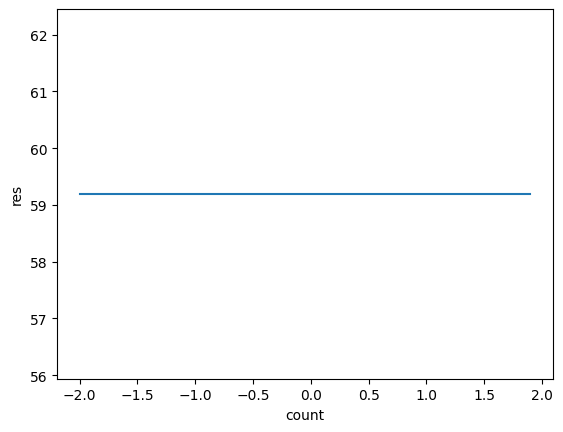

In [160]:
sns.lineplot(data={'count': np.arange(-2, 2, 0.1), 'res': [sum(i[0]) for i in res]}, x="count", y="res")
# sns.lineplot(data={'count': list(range(25, 100, 5)), 'res': [sum(h_mean) for i in res]}, x="count", y="res")

In [161]:
way = Dijkstra(100, 1, feromon_map*(-1))[1]
ways = np.array(list(zip(way[:-2], way[1:])))

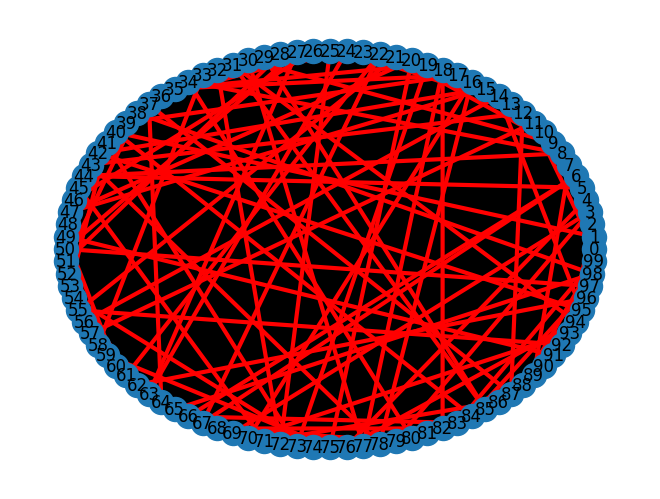

In [162]:
K1 = nx.Graph()

for start, end, length in edges:
    K1.add_edge(start, end, length=length)

nx.draw_circular(K1, with_labels = True)
nx.draw_networkx_edges(K1, nx.circular_layout(K1), edgelist=ways, edge_color='r', arrows=True, width=3)

In [163]:
distance = []
for i in ways:
    distance.append(distance_map[i[0], i[1]])
sum(distance)

49.69514298180717

In [164]:
h_mark = []
h_mean = []
h_max = []
w_mark = []
w_mean = []
w_max = []
for i in distance_map:
    w_mark.append(i[i != -np.inf].min())
    w_mean.append(i[i != -np.inf].mean())
    h_max.append(i[i != -np.inf].max())
for i in distance_map:
    h_mark.append(i[i != -np.inf].min())
    h_mean.append(i[i != -np.inf].mean())
    w_max.append(i[i != -np.inf].max())

sum(h_mark), sum(w_mark), sum(h_mean), sum(w_mean), sum(h_max), sum(w_max)

(5.945548641725283,
 5.945548641725283,
 50.143936607095405,
 50.143936607095405,
 94.45622951672067,
 94.45622951672067)